In [1]:
import pandas as pd

In [2]:
pd.read_csv('G:/내 드라이브/PROJECT/csv/Bank Customer Churn Prediction.csv')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df=pd.read_csv('G:/내 드라이브/PROJECT/csv/Bank Customer Churn Prediction.csv')

In [4]:
# 첫 번째 열 삭제
df = df.iloc[:, 1:]

# 결과 확인
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 범주형 데이터로 변환
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')
df['credit_card'] = df['credit_card'].astype('category')
df['active_member'] = df['active_member'].astype('category')
df['churn'] = df['churn'].astype('category')

In [7]:
df['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: gender, Length: 10000, dtype: category
Categories (2, object): ['Female', 'Male']

In [8]:
# category 타입의 열만 추출
category_cols = df.select_dtypes(include='category')
print(category_cols)


      country  gender credit_card active_member churn
0      France  Female           1             1     1
1       Spain  Female           0             1     0
2      France  Female           1             0     1
3      France  Female           0             0     0
4       Spain  Female           1             1     0
...       ...     ...         ...           ...   ...
9995   France    Male           1             0     0
9996   France    Male           1             1     0
9997   France  Female           0             1     1
9998  Germany    Male           1             0     1
9999   France  Female           1             0     0

[10000 rows x 5 columns]


C:\Users\acy\AppData\Local\Temp\ipykernel_9808\1647117923.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette='viridis', ax=ax)
C:\Users\acy\AppData\Local\Temp\ipykernel_9808\1647117923.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette='viridis', ax=ax)
C:\Users\acy\AppData\Local\Temp\ipykernel_9808\1647117923.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette='viridis', ax=ax)
C:\Users\acy\AppData\Local\Temp\ipykernel_9808\16

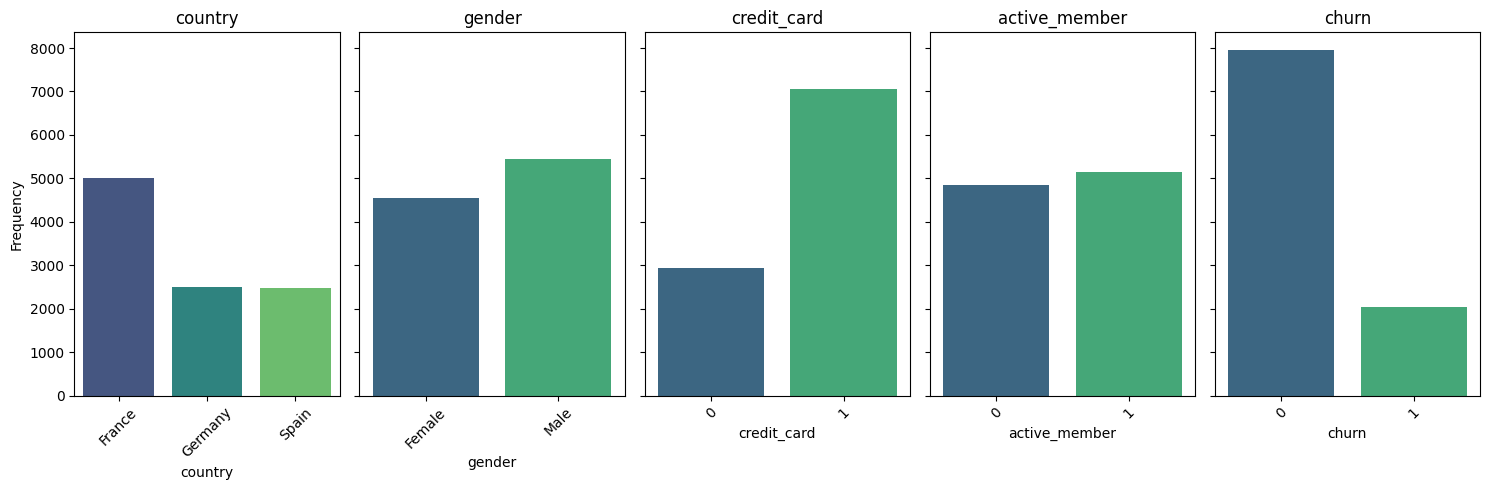

In [19]:
# 범주형 데이터 빈도수

# category 타입의 열만 추출
category_cols = df.select_dtypes(include='category')

# 서브플롯을 위한 함수 정의
def plot_category_frequencies(df):
    num_plots = len(df.columns)
    
    # 서브플롯 설정
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5), sharey=True)
    
    if num_plots == 1:
        axes = [axes]  # single subplot case

    for ax, column in zip(axes, df.columns):
        # 빈도수 계산
        freq = df[column].value_counts()
        
        # 빈도수 바 그래프 생성
        sns.barplot(x=freq.index, y=freq.values, palette='viridis', ax=ax)
        ax.set_title(f'{column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()

# 빈도수 플롯 생성
plot_category_frequencies(category_cols)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  int64   
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  int64   
 7   credit_card       10000 non-null  category
 8   active_member     10000 non-null  category
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 518.3 KB


In [38]:
df.describe(include='all')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.0
unique,NaN,3,2,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0
top,NaN,France,Male,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.0
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,7055.0,5151.0,NaN,7963.0
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,NaN,NaN,100090.239881,NaN
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,NaN,NaN,57510.492818,NaN
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,NaN,NaN,11.580000,NaN
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,NaN,NaN,51002.110000,NaN
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,NaN,NaN,100193.915000,NaN
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,NaN,NaN,149388.247500,NaN


In [39]:
import pandas as pd

# 두 데이터셋 생성
data1 = {'항목': ['A', 'B', 'C'], '데이터셋 1': [10, 20, 30]}
data2 = {'항목': ['A', 'B', 'C'], '데이터셋 2': [15, 25, 35]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 데이터셋 병합
df_comparison = pd.merge(df1, df2, on='항목')
print(df_comparison)


  항목  데이터셋 1  데이터셋 2
0  A      10      15
1  B      20      25
2  C      30      35


In [40]:
import pandas as pd

# 두 데이터셋 생성 (예시 데이터 사용)
data1 = pd.DataFrame({
    f'열 {i+1} 데이터셋 1': [f'값 {i+1}-{j+1}' for j in range(12)] for i in range(10)
})

data2 = pd.DataFrame({
    f'열 {i+1} 데이터셋 2': [f'값 {i+1}-{j+1}' for j in range(12)] for i in range(10)
})

# 데이터셋에 행 인덱스 추가
data1.index = [f'행 {i+1}' for i in range(12)]
data2.index = [f'행 {i+1}' for i in range(12)]

# 데이터셋 병합
df_comparison = pd.concat([data1, data2], axis=1)
print(df_comparison)


     열 1 데이터셋 1 열 2 데이터셋 1 열 3 데이터셋 1 열 4 데이터셋 1 열 5 데이터셋 1 열 6 데이터셋 1  \
행 1       값 1-1      값 2-1      값 3-1      값 4-1      값 5-1      값 6-1   
행 2       값 1-2      값 2-2      값 3-2      값 4-2      값 5-2      값 6-2   
행 3       값 1-3      값 2-3      값 3-3      값 4-3      값 5-3      값 6-3   
행 4       값 1-4      값 2-4      값 3-4      값 4-4      값 5-4      값 6-4   
행 5       값 1-5      값 2-5      값 3-5      값 4-5      값 5-5      값 6-5   
행 6       값 1-6      값 2-6      값 3-6      값 4-6      값 5-6      값 6-6   
행 7       값 1-7      값 2-7      값 3-7      값 4-7      값 5-7      값 6-7   
행 8       값 1-8      값 2-8      값 3-8      값 4-8      값 5-8      값 6-8   
행 9       값 1-9      값 2-9      값 3-9      값 4-9      값 5-9      값 6-9   
행 10     값 1-10     값 2-10     값 3-10     값 4-10     값 5-10     값 6-10   
행 11     값 1-11     값 2-11     값 3-11     값 4-11     값 5-11     값 6-11   
행 12     값 1-12     값 2-12     값 3-12     값 4-12     값 5-12     값 6-12   

     열 7 데이터셋 1 열 8 데이터셋 1 열 9 데이터셋 1

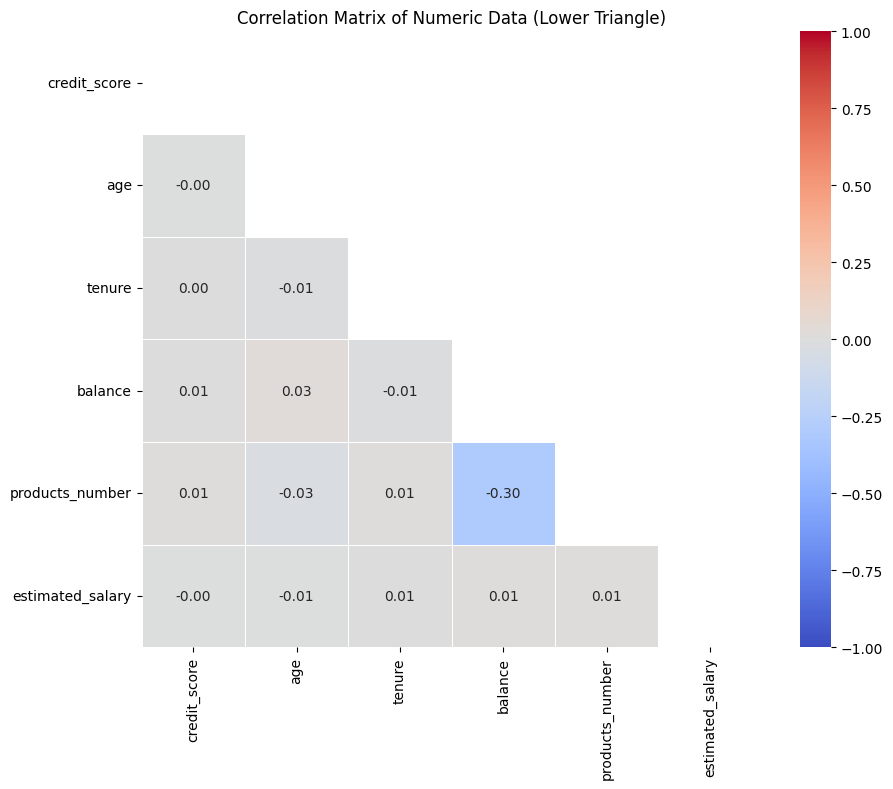

In [16]:
# 수치형 데이터 상관계수

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 수치형 데이터만 추출
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# 수치형 데이터 간의 상관계수 계산
correlation_matrix = numeric_data.corr()

# 하삼각형 마스크 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 상관행렬 시각화
plt.figure(figsize=(10, 8))

# 히트맵 플로팅
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask, linewidths=0.5, vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Matrix of Numeric Data (Lower Triangle)')
plt.show()

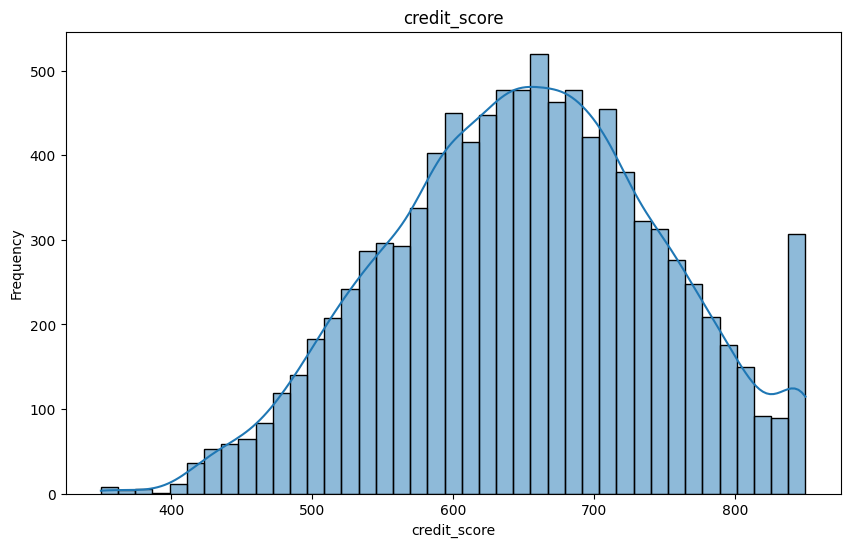

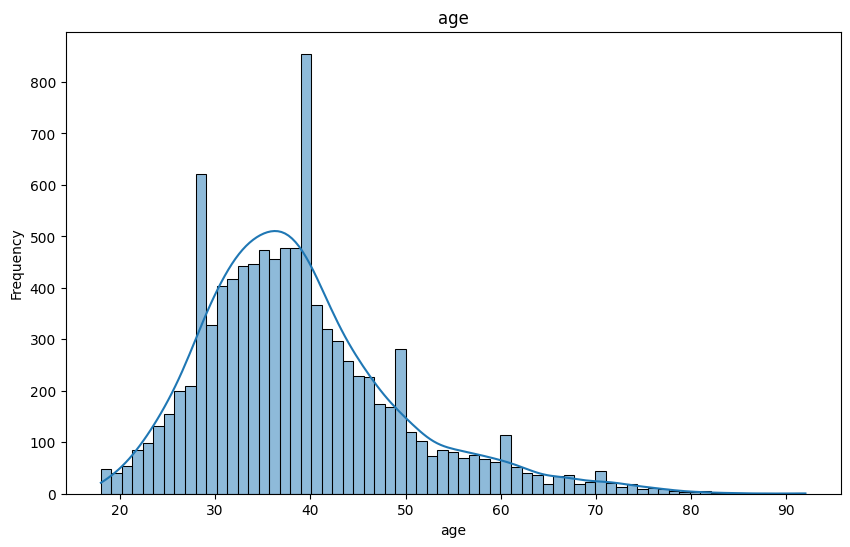

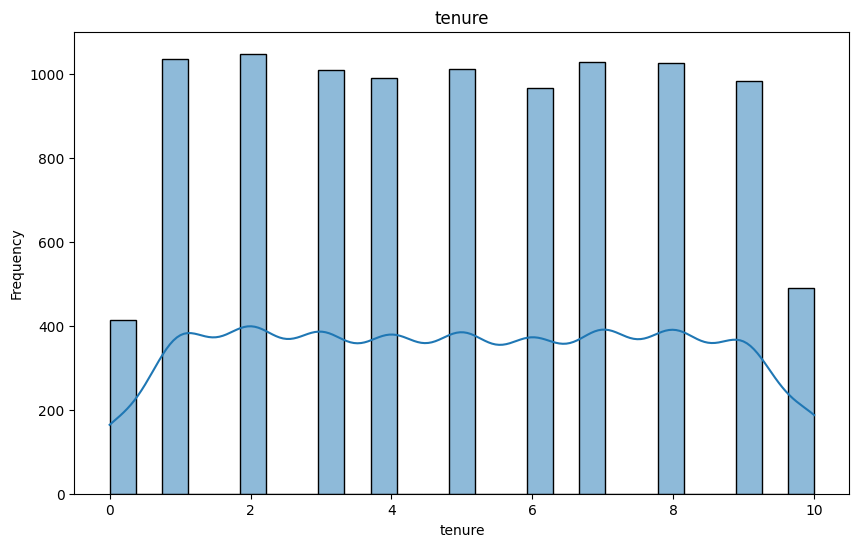

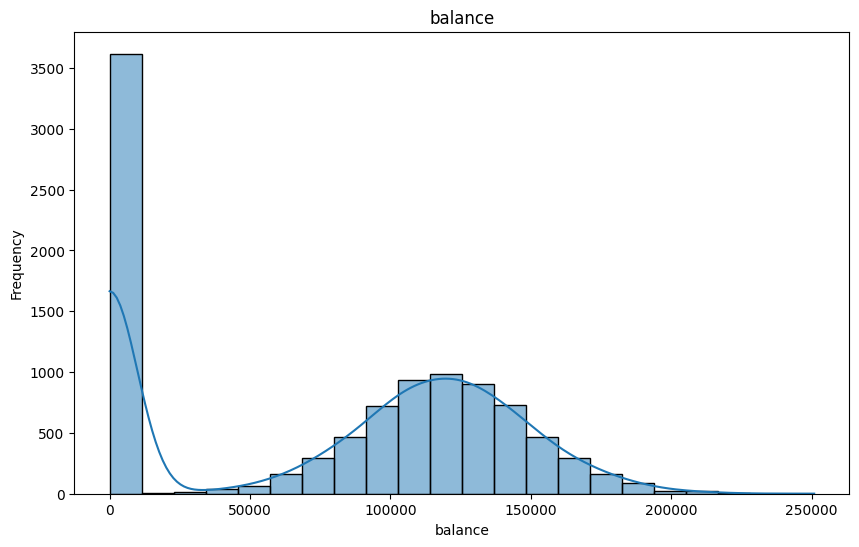

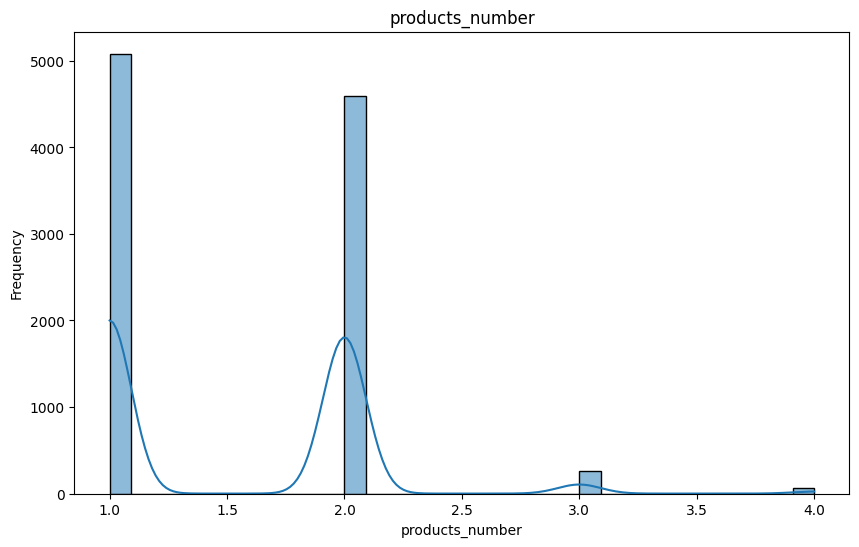

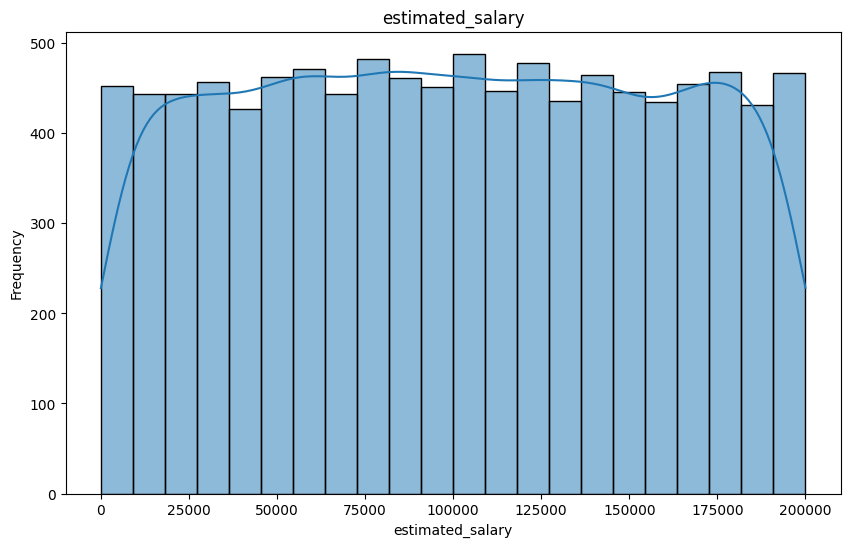

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 타입이 int 또는 float인 컬럼만 필터링
numeric_df = df.select_dtypes(include=[np.int64, np.float64])

# 각 컬럼에 대해 히스토그램 생성
for column in numeric_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_df[column], kde=True)  # kde=True는 커널 밀도 추정
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


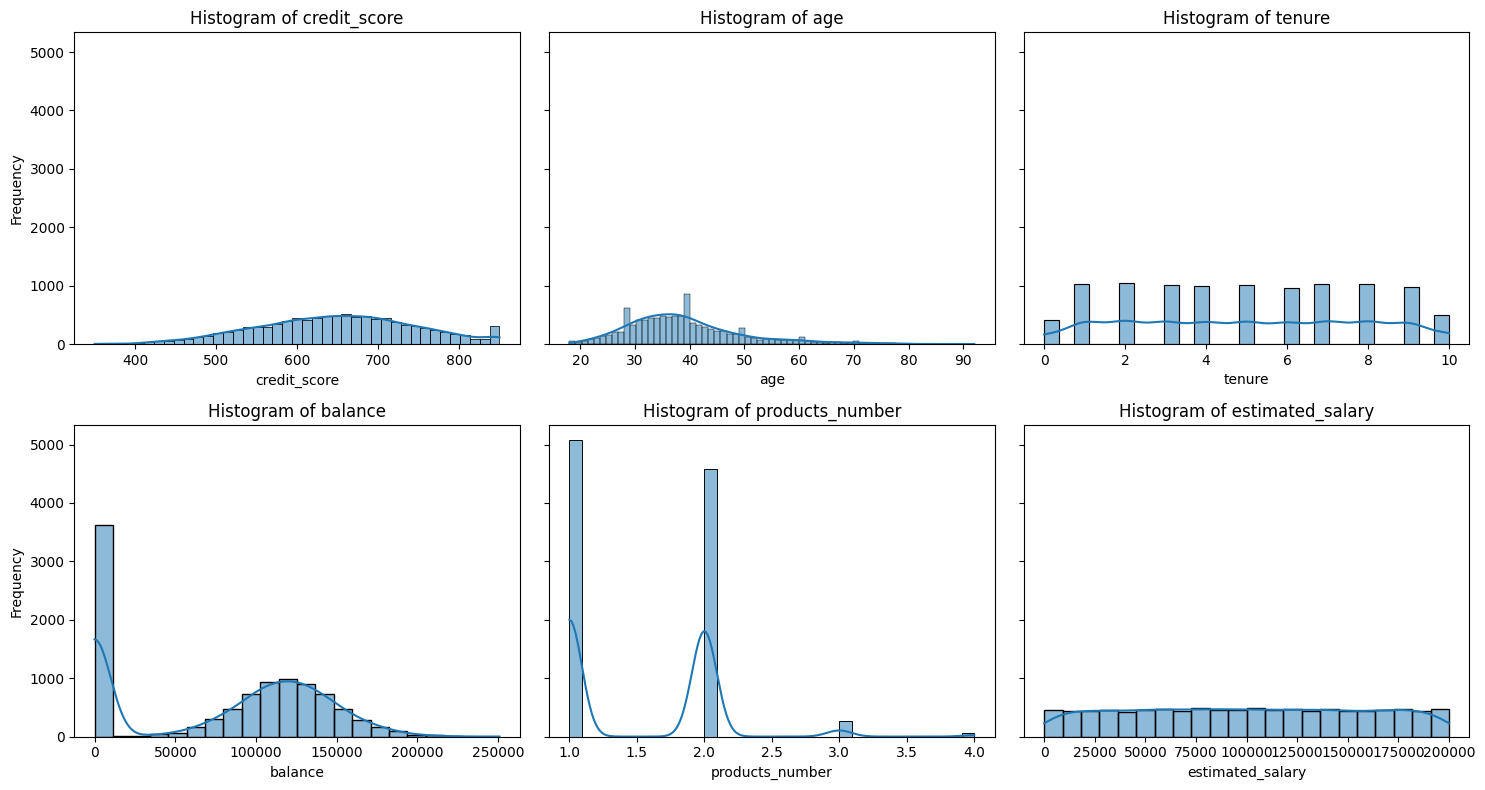

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 타입이 int 또는 float인 컬럼만 필터링
numeric_df = df.select_dtypes(include=[np.int64, np.float64])

# 서브플롯 생성 (2행 3열)
num_cols = len(numeric_df.columns)
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharey=True)

# 각 컬럼에 대해 히스토그램 생성
for i, column in enumerate(numeric_df.columns):
    ax = axes[i // ncols, i % ncols]  # 적절한 서브플롯 선택
    sns.histplot(numeric_df[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# 빈 서브플롯을 제거
for j in range(num_cols, nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout()
plt.show()


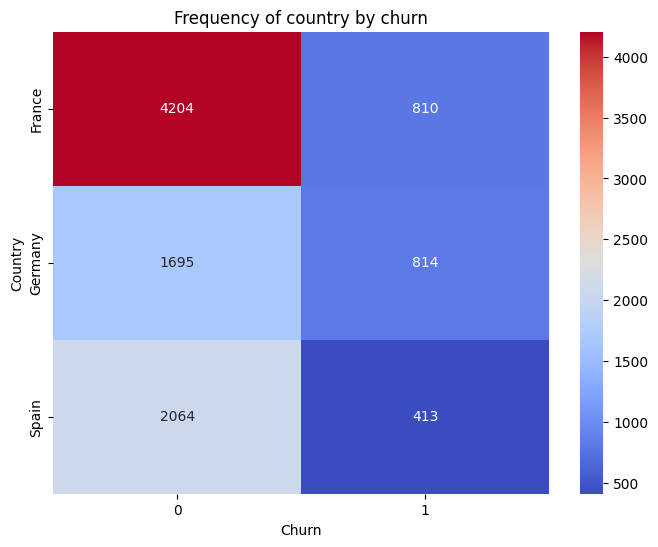

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 성별과 지역에 따른 빈도수 계산
frequency = pd.crosstab(df['country'], df['churn'])

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(frequency, annot=True, cmap='coolwarm', fmt='d')
plt.title('Frequency of country by churn')
plt.xlabel('Churn')
plt.ylabel('Country')
plt.show()


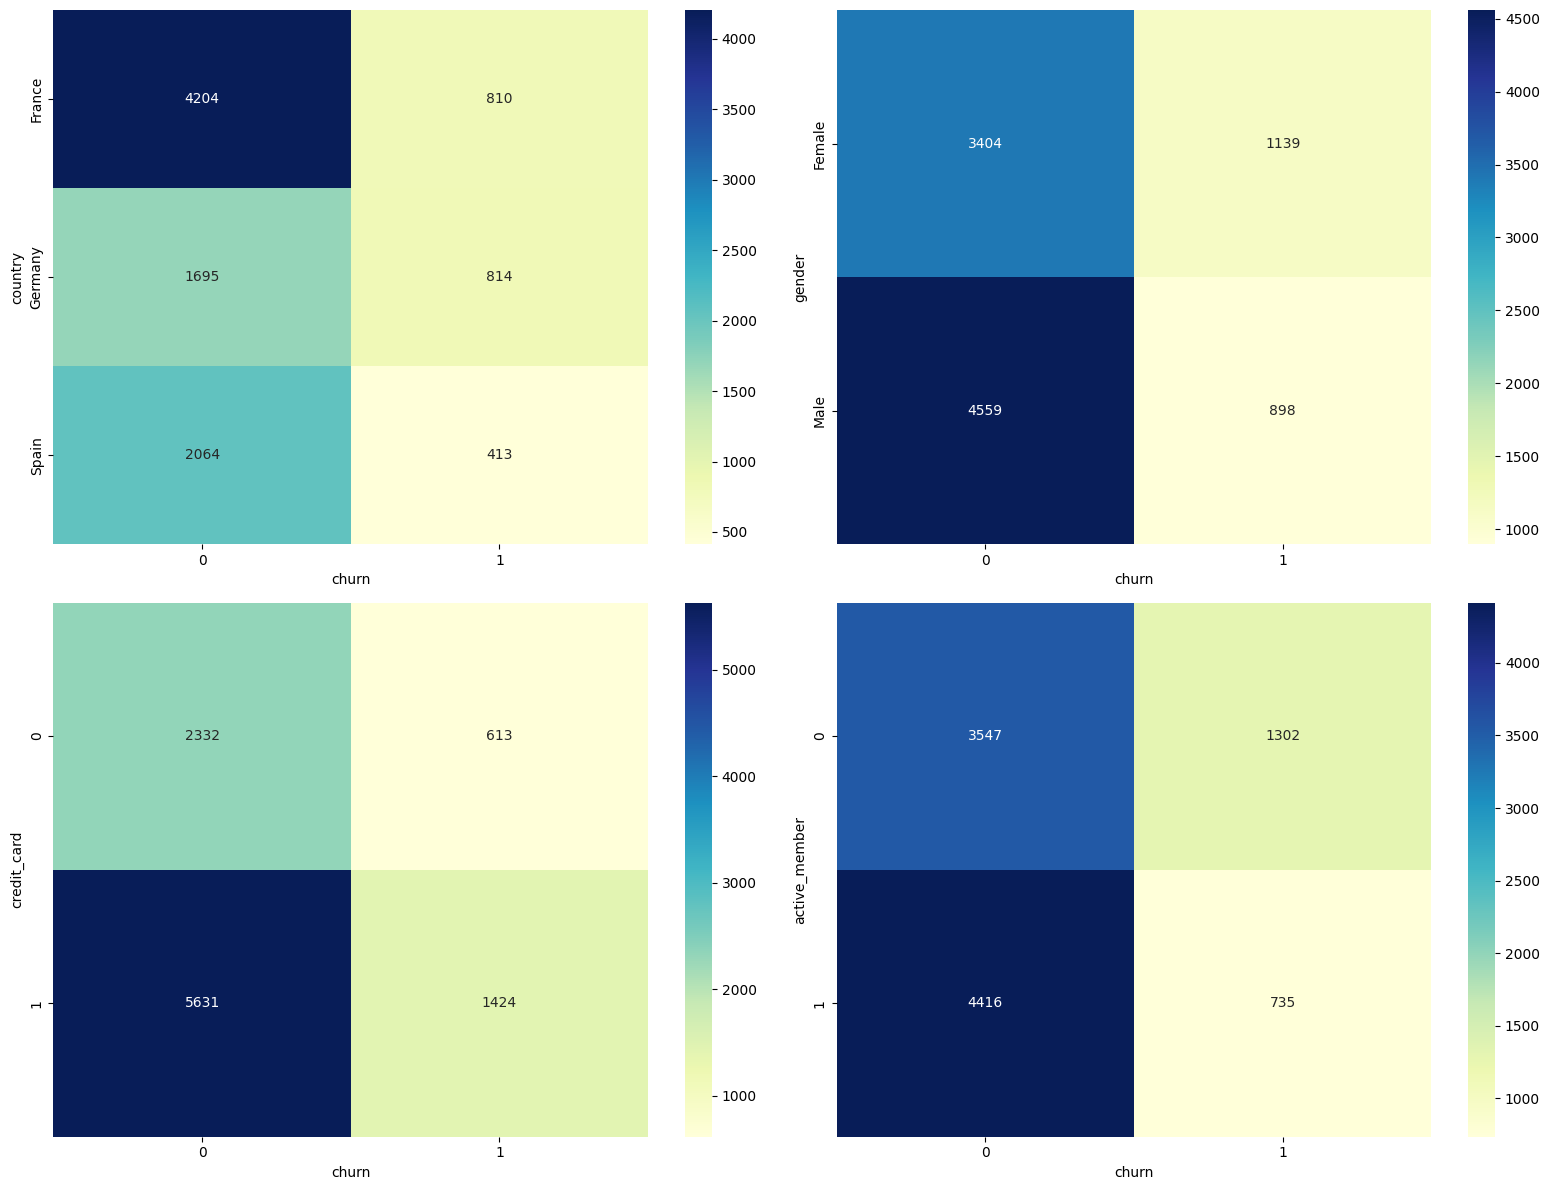

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 각 범주형 칼럼 별로 'ㅂ'의 빈도수 계산
frequency_gb = pd.crosstab(df['country'], df['churn'])
frequency_nb = pd.crosstab(df['gender'], df['churn'])
frequency_db = pd.crosstab(df['credit_card'], df['churn'])
frequency_lb = pd.crosstab(df['active_member'], df['churn'])

# 플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 히트맵 생성
sns.heatmap(frequency_gb, annot=True, cmap='YlGnBu', fmt='d', ax=axes[0, 0])
axes[0, 0].set_xlabel('churn')
axes[0, 0].set_ylabel('country')

sns.heatmap(frequency_nb, annot=True, cmap='YlGnBu', fmt='d', ax=axes[0, 1])
axes[0, 1].set_xlabel('churn')
axes[0, 1].set_ylabel('gender')

sns.heatmap(frequency_db, annot=True, cmap='YlGnBu', fmt='d', ax=axes[1, 0])
axes[1, 0].set_xlabel('churn')
axes[1, 0].set_ylabel('credit_card')

sns.heatmap(frequency_lb, annot=True, cmap='YlGnBu', fmt='d', ax=axes[1, 1])
axes[1, 1].set_xlabel('churn')
axes[1, 1].set_ylabel('active_member')

plt.tight_layout()
plt.show()

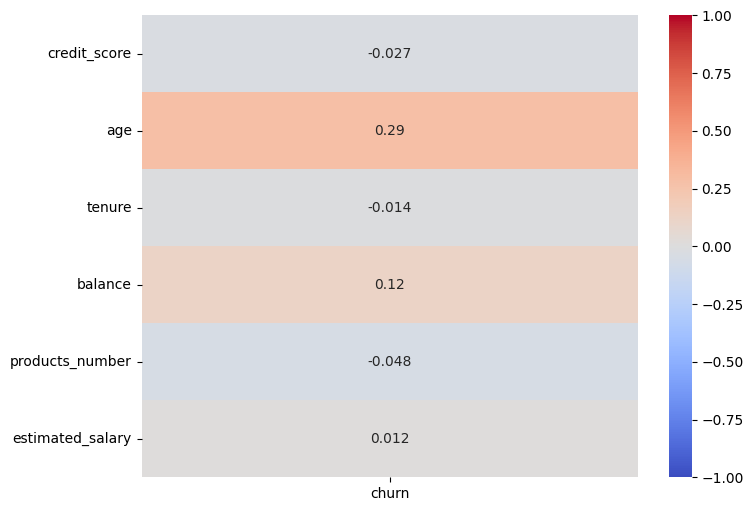

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 원하는 칼럼만 선택하여 새로운 데이터프레임 생성
selected_columns = ['credit_score', 'age', 'tenure', 'balance',
                    'products_number','estimated_salary','churn']
data_selected = df[selected_columns]

# 수치형 칼럼과 범주형 칼럼 간의 상관계수 계산
correlation = data_selected.corr()

# 수치형 칼럼과 범주형 칼럼 간의 상관계수만 추출
numeric_columns = ['credit_score', 'age', 'tenure', 'balance',
                    'products_number','estimated_salary']
category_column = 'churn'
correlation_with_category = correlation.loc[numeric_columns, [category_column]]

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_category, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title("Correlation between Numeric Variables and Categorical Variable 'churn'")
plt.show()


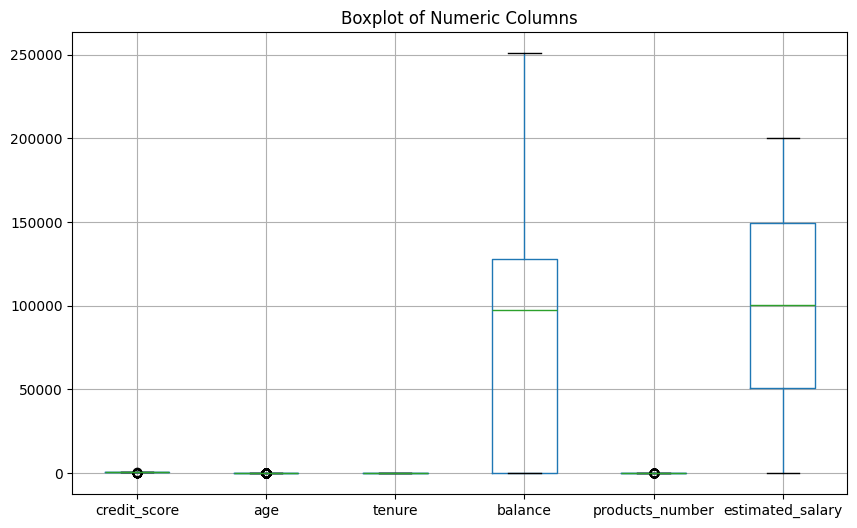

이상치가 존재하는 데이터:
      credit_score  age  tenure    balance  products_number  estimated_salary
7              376   29       4  115046.74                4         119346.88
58             511   66       4       0.00                1           1643.11
70             738   58       2  133745.44                4          28373.86
85             652   75      10       0.00                2         114675.75
104            670   65       1       0.00                1         177655.68
...            ...  ...     ...        ...              ...               ...
9753           656   68       7  153545.11                1         186574.68
9765           445   64       2  136770.67                1          43678.06
9832           595   64       2  105736.32                1          89935.73
9894           521   77       6       0.00                2          49054.10
9936           609   77       1       0.00                1          18708.76

[432 rows x 6 columns]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 박스플롯 그리기 및 이상치 탐지
plt.figure(figsize=(10, 6))
numeric_df.boxplot()
plt.title("Boxplot of Numeric Columns")
plt.show()

# 4. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 검출
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 5. 이상치 데이터 출력
print("이상치가 존재하는 데이터:")
print(numeric_df[outliers.any(axis=1)])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 각각의 칼럼에 대해 박스플롯 그리기
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(numeric_df[column], vert=False)
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# 4. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 검출
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 5. 이상치 데이터 출력
print("이상치가 존재하는 데이터:")
print(numeric_df[outliers.any(axis=1)])


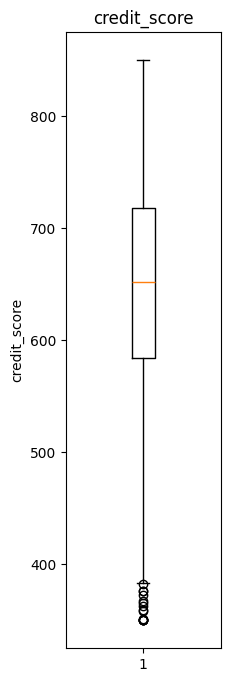

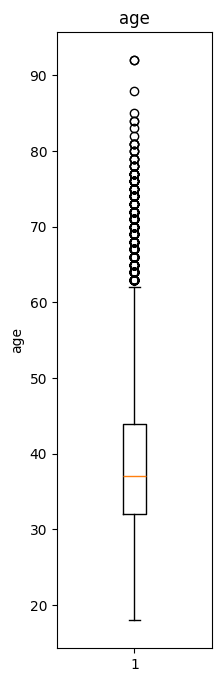

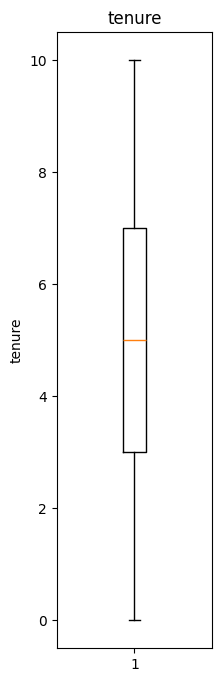

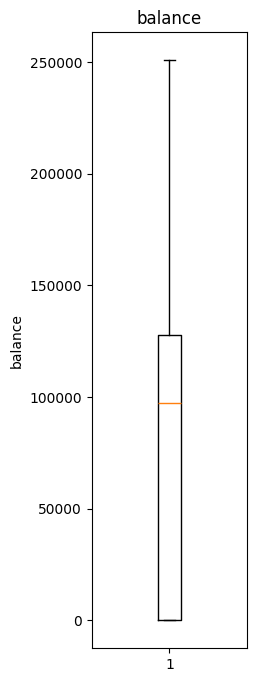

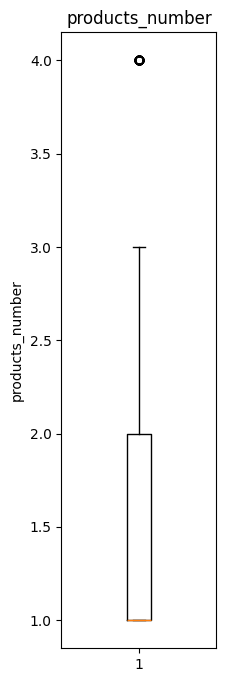

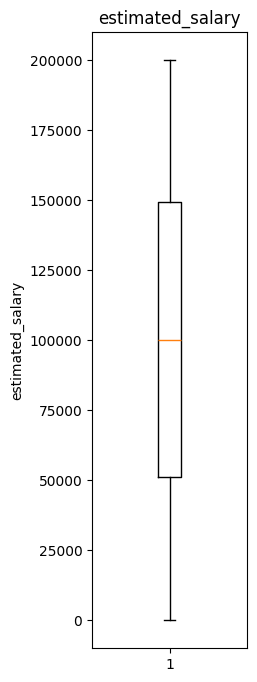

이상치가 존재하는 데이터:
      credit_score  age  tenure    balance  products_number  estimated_salary
7              376   29       4  115046.74                4         119346.88
58             511   66       4       0.00                1           1643.11
70             738   58       2  133745.44                4          28373.86
85             652   75      10       0.00                2         114675.75
104            670   65       1       0.00                1         177655.68
...            ...  ...     ...        ...              ...               ...
9753           656   68       7  153545.11                1         186574.68
9765           445   64       2  136770.67                1          43678.06
9832           595   64       2  105736.32                1          89935.73
9894           521   77       6       0.00                2          49054.10
9936           609   77       1       0.00                1          18708.76

[432 rows x 6 columns]


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 각각의 칼럼에 대해 수직 박스플롯 그리기
for column in numeric_df.columns:
    plt.figure(figsize=(2, 8))
    plt.boxplot(numeric_df[column], vert=True)
    plt.title(f"{column}")
    plt.ylabel(column)
    plt.show()

# 4. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 검출
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 5. 이상치 데이터 출력
print("이상치가 존재하는 데이터:")
print(numeric_df[outliers.any(axis=1)])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 여러 수치형 칼럼을 하나의 플롯에 박스플롯으로 그리기
plt.figure(figsize=(10, 8))
numeric_df.boxplot()
plt.title("Boxplot of Numeric Columns")
plt.ylabel("Value")
plt.xlabel("Columns")
plt.show()

# 4. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상


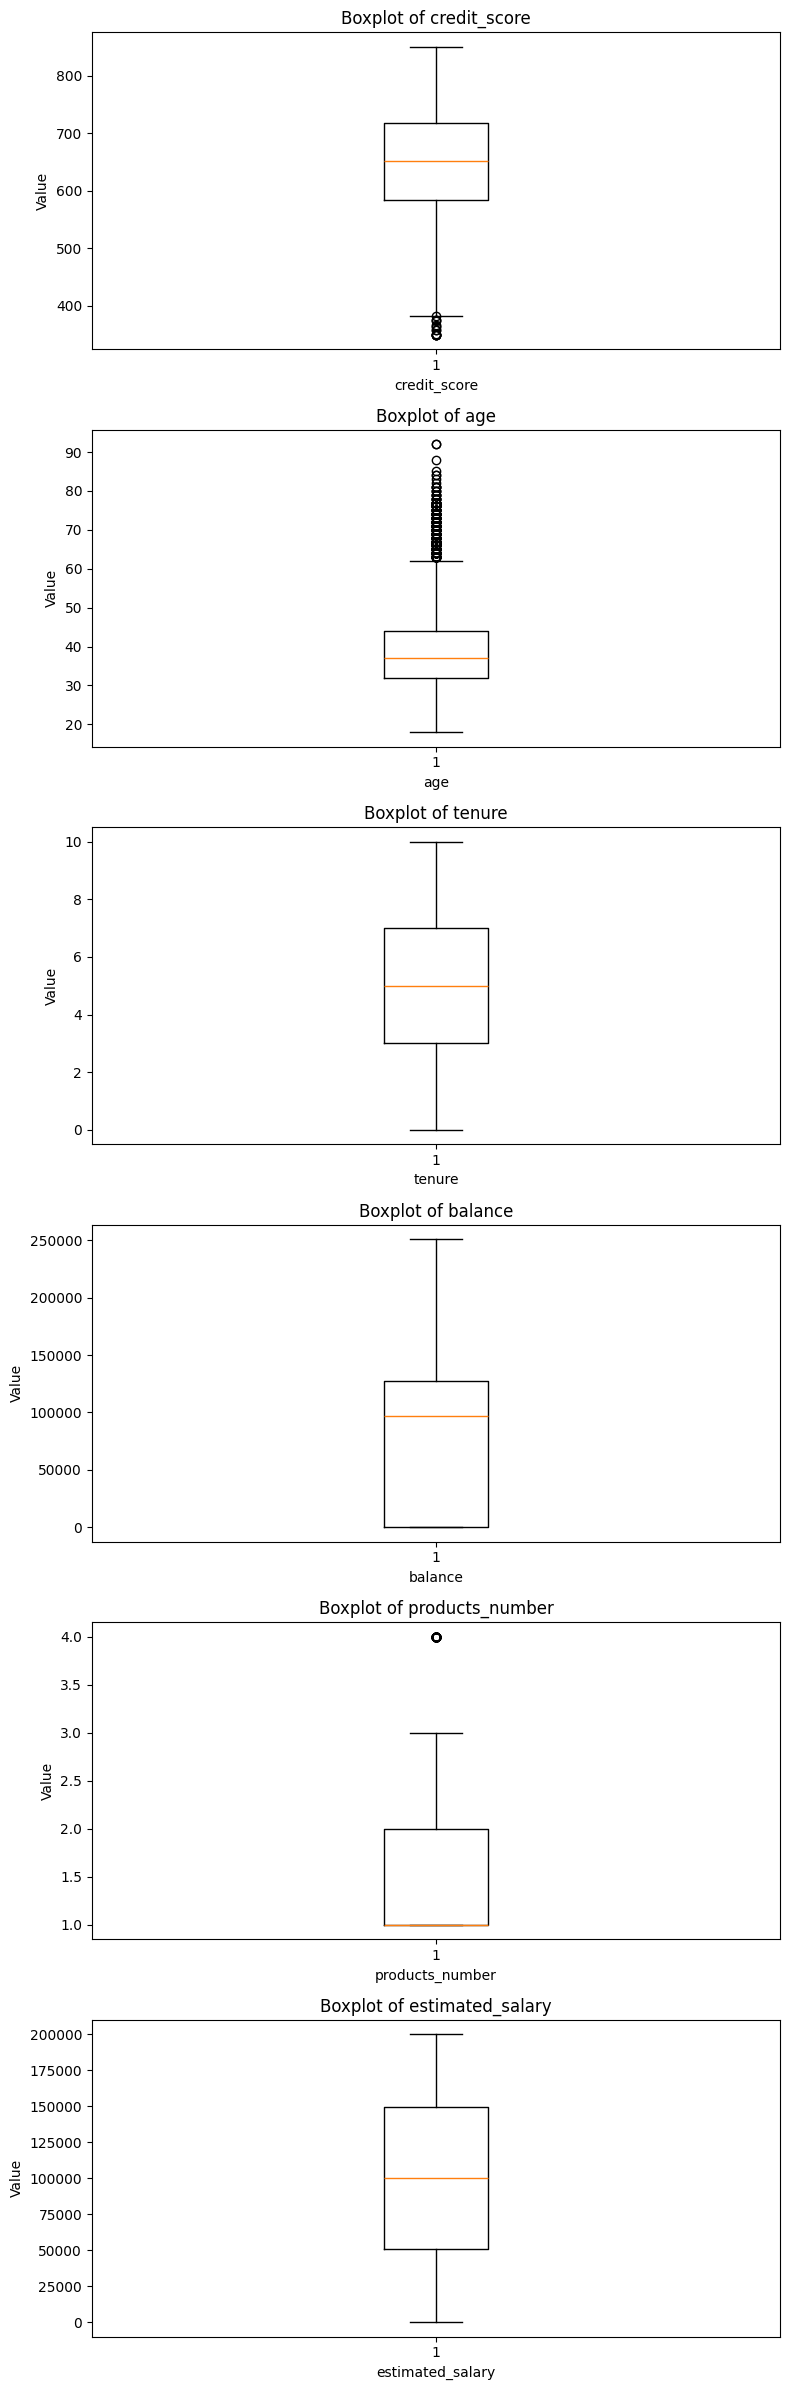

이상치가 존재하는 데이터:
      credit_score  age  tenure    balance  products_number  estimated_salary
7              376   29       4  115046.74                4         119346.88
58             511   66       4       0.00                1           1643.11
70             738   58       2  133745.44                4          28373.86
85             652   75      10       0.00                2         114675.75
104            670   65       1       0.00                1         177655.68
...            ...  ...     ...        ...              ...               ...
9753           656   68       7  153545.11                1         186574.68
9765           445   64       2  136770.67                1          43678.06
9832           595   64       2  105736.32                1          89935.73
9894           521   77       6       0.00                2          49054.10
9936           609   77       1       0.00                1          18708.76

[432 rows x 6 columns]


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 서브플롯 생성
num_columns = numeric_df.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 4 * num_columns))

# 4. 각 칼럼에 대해 박스플롯 그리기
for i, column in enumerate(numeric_df.columns):
    axes[i].boxplot(numeric_df[column])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_ylabel("Value")
    axes[i].set_xlabel(column)

# 5. 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

# 6. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 검출
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 7. 이상치 데이터 출력
print("이상치가 존재하는 데이터:")
print(numeric_df[outliers.any(axis=1)])

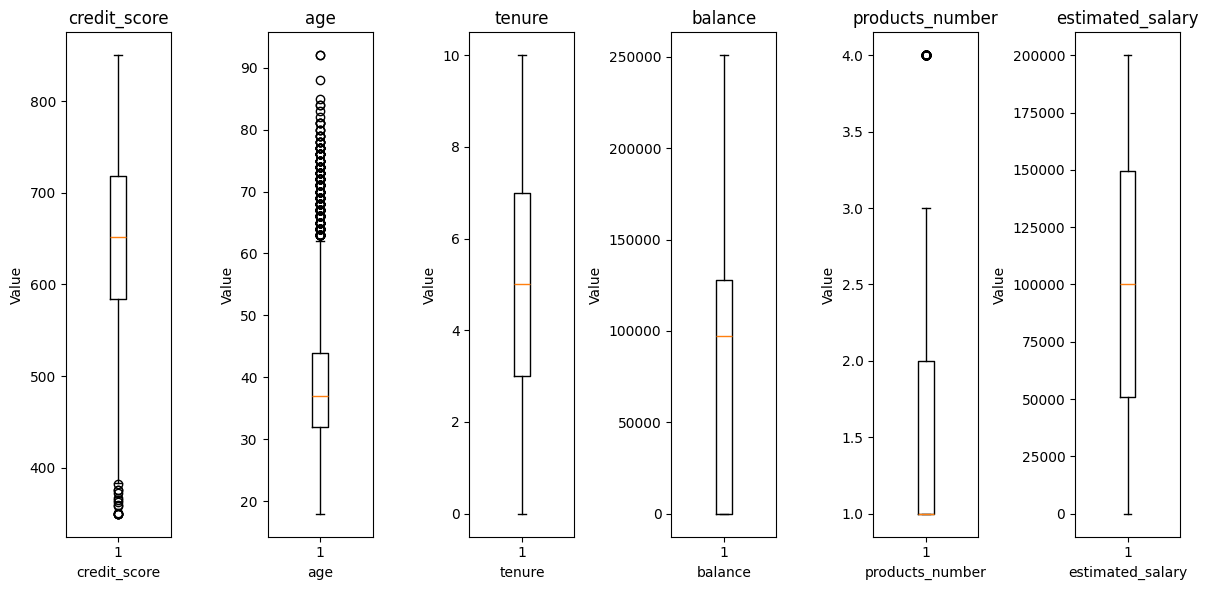

이상치가 존재하는 데이터:
      credit_score  age  tenure    balance  products_number  estimated_salary
7              376   29       4  115046.74                4         119346.88
58             511   66       4       0.00                1           1643.11
70             738   58       2  133745.44                4          28373.86
85             652   75      10       0.00                2         114675.75
104            670   65       1       0.00                1         177655.68
...            ...  ...     ...        ...              ...               ...
9753           656   68       7  153545.11                1         186574.68
9765           445   64       2  136770.67                1          43678.06
9832           595   64       2  105736.32                1          89935.73
9894           521   77       6       0.00                2          49054.10
9936           609   77       1       0.00                1          18708.76

[432 rows x 6 columns]


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. 수치형 칼럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 3. 서브플롯 생성 (가로로 붙이기)
num_columns = numeric_df.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(2 * num_columns, 6))

# 4. 각 칼럼에 대해 박스플롯 그리기
for i, column in enumerate(numeric_df.columns):
    axes[i].boxplot(numeric_df[column])
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel("Value")
    axes[i].set_xlabel(column)

# 5. 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

# 6. 이상치 탐지 (IQR 방법 사용)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 검출
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 7. 이상치 데이터 출력
print("이상치가 존재하는 데이터:")
print(numeric_df[outliers.any(axis=1)])


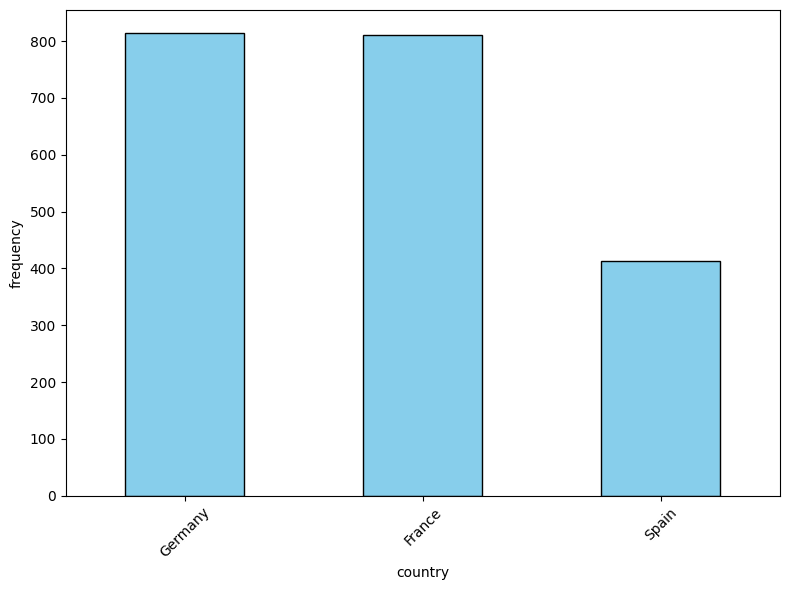

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 결과값이 1인 데이터만 필터링
filtered_df = df[df['churn'] == 1]

# '컬럼명'의 값의 분포를 집계
distribution = filtered_df['country'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
distribution.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('결과값이 1인 데이터의 컬럼명 분포')
plt.xlabel('country')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
